In [65]:
from moviepy.video.io.VideoFileClip import VideoFileClip

In [66]:
# Load the video file
video = VideoFileClip("input/PXL_20250222_123802359.mp4")

# Extract the audio
audio = video.audio

# Write the audio to a file
audio.write_audiofile("output/output_audio.mp3")

{'video_found': True, 'audio_found': True, 'metadata': {'major_brand': 'isom', 'minor_version': '131072', 'compatible_brands': 'isomiso2mp41', 'creation_time': '2025-02-22T12:39:42.000000Z', 'location': '+52.4222+9.8272/', 'location-eng': '+52.4222+9.8272/', 'com.android.manufacturer': 'Google', 'com.android.model': 'Pixel 5', 'com.android.capture.fps': '30.000000'}, 'inputs': [{'streams': [{'input_number': 0, 'stream_number': 0, 'stream_type': 'data', 'language': 'eng', 'default': True, 'metadata': {'Metadata': '', 'creation_time': '2025-02-22T12:39:42.000000Z', 'handler_name': 'MetaHandle'}}, {'input_number': 0, 'stream_number': 1, 'stream_type': 'audio', 'language': 'eng', 'default': True, 'fps': 48000, 'bitrate': 191, 'metadata': {'Metadata': '', 'creation_time': '2025-02-22T12:39:42.000000Z', 'handler_name': 'SoundHandle', 'vendor_id': '[0][0][0][0]'}}, {'input_number': 0, 'stream_number': 2, 'stream_type': 'video', 'language': 'eng', 'default': True, 'size': [3840, 2160], 'bitrat

MoviePy - Done.


In [67]:
from numpy import log10
from pydub import AudioSegment
from pydub.silence import detect_nonsilent

# Load the audio file
audio_segment = AudioSegment.from_mp3("output/output_audio.mp3")

# Define chunk size (in milliseconds)
chunk_size = 1000  # 5 seconds

# Define loudness threshold (in dBFS)
loudness_threshold = -17

# Find nonsilent parts
nonsilent_ranges = detect_nonsilent(audio_segment, min_silence_len=chunk_size, silence_thresh=loudness_threshold)

# get segments by ranges
for start, end in nonsilent_ranges:
    segment_audio = audio_segment[start:end]
    max_amplitude = segment_audio.max

    start_in_seconds = start / 1000
    end_in_seconds = end / 1000
    duration_in_seconds = (end - start) / 1000
    print(f"Max amplitude in segment: {max_amplitude:.2f}")
    print(f"Loud segment: {start_in_seconds:.2f}s to {end_in_seconds:.2f}s (duration: {duration_in_seconds:.2f}s)")



Max amplitude in segment: 28742.00
Loud segment: 40.66s to 40.74s (duration: 0.08s)
Max amplitude in segment: 31005.00
Loud segment: 46.88s to 48.49s (duration: 1.60s)
Max amplitude in segment: 30785.00
Loud segment: 49.93s to 53.64s (duration: 3.70s)
Max amplitude in segment: 30999.00
Loud segment: 59.21s to 59.85s (duration: 0.64s)
Max amplitude in segment: 31510.00
Loud segment: 68.74s to 68.84s (duration: 0.10s)
Max amplitude in segment: 31397.00
Loud segment: 73.73s to 75.69s (duration: 1.97s)
Max amplitude in segment: 29786.00
Loud segment: 80.34s to 80.49s (duration: 0.16s)
Max amplitude in segment: 31454.00
Loud segment: 85.25s to 86.59s (duration: 1.33s)
Max amplitude in segment: 32622.00
Loud segment: 92.28s to 95.47s (duration: 3.19s)


Sample rate: 44100 Hz
Duration: 98.35 seconds


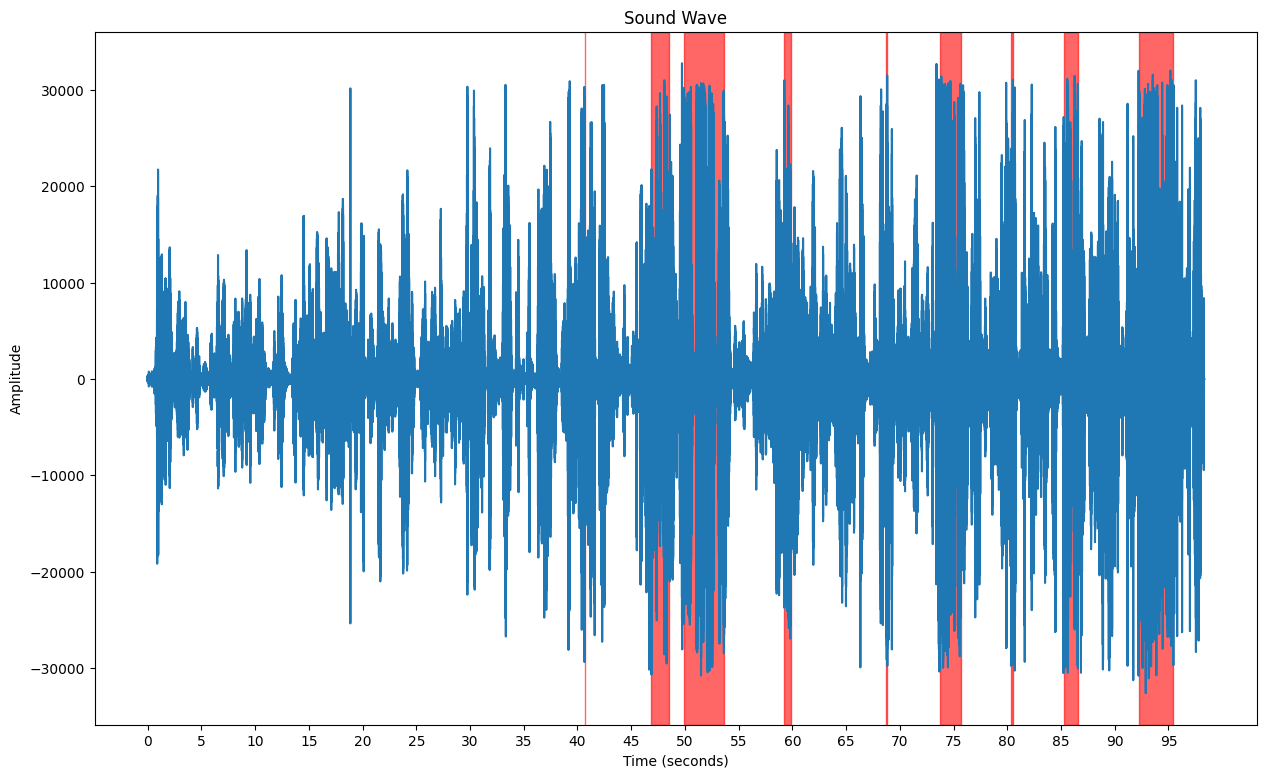

In [75]:
# imports 
import matplotlib.pyplot as plt 
import numpy as np 
  
# shows the sound waves 
def visualize(path: str): 
    
    # reading the audio file 
    audio_segment = AudioSegment.from_mp3(path)
    
    samples = audio_segment.get_array_of_samples()

    sample_rate = audio_segment.frame_rate
    print(f"Sample rate: {sample_rate} Hz")

    duration = audio_segment.duration_seconds
    print(f"Duration: {duration:.2f} seconds")
  
    # to Plot the x-axis in seconds  
    # you need get the frame rate  
    # and divide by size of your signal 
    # to create a Time Vector  
    # spaced linearly with the size  
    # of the audio file 
    time = np.linspace( 
        0, # start 
        duration, 
        num = len(samples) 
    ) 

    # high resolution plot
    plt.figure(figsize=(15, 9))
  
    # using matplotlib to plot 
    # creates a new figure 
    plt.figure(1) 
      
    # title of the plot 
    plt.title("Sound Wave") 
      
    # label of axis 
    plt.xticks(np.arange(0, duration, 5))
    plt.xlabel('Time (seconds)')
    plt.ylabel('Amplitude')
     
    # actual plotting 
    plt.plot(time, samples) 

    for start, end in nonsilent_ranges:
        plt.axvspan(start / 1000, end / 1000, color='red', alpha=0.6, label='Nonsilent Range')
      
    # shows the plot  
    # in new window 
    plt.show() 
  
    # you can also save 
    # the plot using 
    # plt.savefig('filename') 

visualize("output/output_audio.mp3") 